# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fitria Amanda Pratiwi]
- **Email:** [fitriaamanda13@gmail.com]
- **ID Dicoding:** [fitriaamanda]

## Menentukan Pertanyaan Bisnis

1. Apakah musim berpengaruh terhadap preferensi penyewa
sepeda, baik penyewa tidak terdaftar maupun yang terdaftar?
2. Bagaimana kondisi ketika sepeda digunakan pada hari kerja(hr_krj), hari libur(hr_lbr), dan hari biasa(hr_biasa)?
3. Apakah cuaca memiliki peran dalam jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

Melakukan import kepada semua library yang digunakan dalam proyek analisis data Bike Sharing.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Karena menggunakan **dataset Bike Sharing**, maka saya melakukan impor file **day.csv** & **hour.csv**

**Menghubungkan Google Drive dengan Google Colab**


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Membaca file day.csv**

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membaca file hour.csv**

In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai data day_df**

- Melakukan pemeriksaan terhadap tipe data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kesimpulan: terdapat data yang perlu diperbaiki yaitu pada column **dteday** menjadi **datetime**.


- Melakukan pemeriksaan missing values (jika ada)

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: day_df tidak ada missing values.

- Melakukan pemeriksaan duplikasi data

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Kesimpulan: day_df tidak ada data duplikasi.

- Melakukan pemeriksaan terhadap nilai statistik day_df

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kesimpulan: tidak ada masalah pada nilai statistik day_df.

**Menilai data hour_df**

- Melakukan pemeriksaan terhadap tipe data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kesimpulan: terdapat data yang perlu diperbaiki yaitu pada column **dteday** menjadi **datetime**.


- Melakukan pemeriksaan missing values (jika ada)

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: hour_df tidak ada missing values.

- Melakukan pemeriksaan duplikasi data

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Kesimpulan: hour_df tidak ada data duplikasi.

- Melakukan pemeriksaan terhadap nilai statistik hour_df

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kesimpulan: tidak ada masalah pada nilai statistik hour_df.

### Cleaning Data

Berdasarkan proses assessing data sebelumnya, baik pada day_df maupun hour_df tidak ada masalah seperti duplikat data, dan lain-lain.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Membersihkan data hour_df

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Melakukan penghapusan tabel yang tidak diperlukan.

Mengapa dihapus? karena isi dari tabel hour dan day hanya memiliki perbedaan pada kolom hournya.


In [ ]:
del hour_df

- Melakukan penghapusan beberapa kolom yang tidak digunakan

In [ ]:
# List kolom yang akan dihapus
drop_cols = ['instant', 'windspeed']

# Buat DataFrame baru tanpa kolom yang akan dihapus
day_df_filtered = day_df.drop(columns=drop_cols)

# Tampilkan lima baris pertama dari DataFrame yang telah difilter
day_df_filtered.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


- Melakukan perubahan terhadap kolom

In [ ]:
# Mengubah nama judul kolom dengan variasi yang berbeda
day_df.rename(columns={
    'dteday': 'tgl_hr',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'weathersit': 'kondisi_cuaca',
    'holiday': 'hr_lbr',
    'weekday': 'hr_biasa',
    'workingday': 'hr_krj',
    'temp': 'suhu_akt', #suhu yang aktual
    'atemp': 'suhu_trs', #suhu yang terasa
    'hum': 'kelembaban',
    'casual': 'tdk_daftar',
    'registered': 'terdaftar',
    'windspeed': 'kecepatan_angin',
    'cnt': 'jumlah'
}, inplace=True)

day_df.head()


,instant,tgl_hr,musim,tahun,bulan,hr_lbr,hr_biasa,hr_krj,kondisi_cuaca,suhu_akt,suhu_trs,kelembaban,kecepatan_angin,tdk_daftar,terdaftar,jumlah
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mengubah angka menjadi keterangan dengan variasi acak pada keterangan
day_df['bulan'] = day_df['bulan'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})
day_df['musim'] = day_df['musim'].map({
    1: 'Musim Panas', 2: 'Musim Gugur', 3: 'Musim Dingin', 4: 'Musim Semi'
})
day_df['hr_biasa'] = day_df['hr_biasa'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['kondisi_cuaca'] = day_df['kondisi_cuaca'].map({
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan',
    4: 'Salju'
})


In [ ]:
# Mengubah tipe data ke datetime
day_df['tgl_hr'] = pd.to_datetime(day_df.tgl_hr)

# Mengubah tipe data ke categorical
day_df['musim'] = day_df.musim.astype('category')
day_df['tahun'] = day_df.tahun.astype('category')
day_df['bulan'] = day_df.bulan.astype('category')
day_df['hr_lbr'] = day_df.hr_lbr.astype('category')
day_df['hr_biasa'] = day_df.hr_biasa.astype('category')
day_df['hr_krj'] = day_df.hr_krj.astype('category')
day_df['kondisi_cuaca'] = day_df.kondisi_cuaca.astype('category')

day_df.head()

,instant,tgl_hr,musim,tahun,bulan,hr_lbr,hr_biasa,hr_krj,kondisi_cuaca,suhu_akt,suhu_trs,kelembaban,kecepatan_angin,tdk_daftar,terdaftar,jumlah
0,1,2011-01-01,Musim Panas,0,Januari,0,Sabtu,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Panas,0,Januari,0,Minggu,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Panas,0,Januari,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Panas,0,Januari,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Panas,0,Januari,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tgl_hr           731 non-null    datetime64[ns]
 2   musim            731 non-null    category      
 3   tahun            731 non-null    category      
 4   bulan            731 non-null    category      
 5   hr_lbr           731 non-null    category      
 6   hr_biasa         731 non-null    category      
 7   hr_krj           731 non-null    category      
 8   kondisi_cuaca    731 non-null    category      
 9   suhu_akt         731 non-null    float64       
 10  suhu_trs         731 non-null    float64       
 11  kelembaban       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  tdk_daftar       731 non-null    int64         
 14  terdaftar        731 non-null    int64    

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

- Menggolongkan penyewa sepeda (yang terdaftar & tidak terdaftar) berdasarkan bulan.


In [ ]:
day_df.groupby(by='bulan').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
             max   min         mean     sum
bulan                                      
Agustus     7865  1115  5664.419355  351194
April       7460   795  4484.900000  269094
Desember    6606   441  3403.806452  211036
Februari    5062  1005  2655.298246  151352
Januari     4521   431  2176.338710  134933
Juli        8173  3285  5563.677419  344948
Juni        8120  3767  5772.366667  346342
Maret       8362   605  3692.258065  228920
Mei         8294  2633  5349.774194  331686
November    6852  1495  4247.183333  254831
Oktober     8156    22  5199.225806  322352
September   8714  1842  5766.516667  345991

Kesimpulan: dari hasil tersebut ditemukan bahwa bulan dengan jumlah dan rata-rata paling tinggi adalah bulan Juni, sementara bulan dengan jumlah dan rata-rata paling rendah adalah bulan Januari.

- Menggolongkan penyewa sepeda (yang terdaftar & tidak terdaftar) berdasarkan keadaan cuaca.



In [ ]:
day_df.groupby(by='kondisi_cuaca').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
                 max  min         mean      sum
kondisi_cuaca                                  
Berawan         8362  605  4035.862348   996858
Cerah           8714  431  4876.786177  2257952
Hujan           4639   22  1803.285714    37869

Kesimpulan: dari hasil tersebut ditemukan bahwa penyewa sepeda cenderung menyewa saat cuaca cerah atau sedikit mendung. Sedangkan jumlah penyewa sangat sedikit saat hujan turun dan hampir tidak ada saat cuaca bersalju.

- Menggolongkan penyewa sepeda (yang terdaftar & tidak terdaftar) berdasarkan hari libur (hr_lbr)

In [ ]:
day_df.groupby(by='hr_lbr').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                            
          max   min         mean      sum
hr_lbr                                   
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Keismpulan: dari hasil tersebut ditemukan bahwa penyewa sepeda cenderung menyewa sepeda pada hari kerja/hari biasa daripada pada hari libur.

- Membandingkan penyewaan sepeda pada hari kerja (hr_krj) dengan hari libur (hr_lbr)

In [ ]:
day_df.groupby(by='hr_biasa').agg({
    'jumlah':['max','min','mean']
})

jumlah                   
            max   min         mean
hr_biasa                          
Jumat      8362  1167  4690.288462
Kamis      7804   431  4667.259615
Minggu     8227   605  4228.828571
Rabu       8173   441  4548.538462
Sabtu      8714   627  4550.542857
Selasa     7767   683  4510.663462
Senin      7525    22  4338.123810

Kesimpulan: dari hasil tersebut ditemukan bahwa urutan hari dengan jumlah penyewa terbesar ke terkecil adalah Jumat, Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.

- Menggolongkan penyewa sepeda (yang terdaftar & tidak terdaftar) berdasarkan hari kerja (hr_krj)

In [ ]:
day_df.groupby(by='hr_krj').agg({
    'jumlah': ['max', 'min', 'mean']
})


jumlah                  
          max  min         mean
hr_krj                         
0        8714  605  4330.168831
1        8362   22  4584.820000

Kesimpulan: dari hasil tersebut ditemukan bahwa penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Meskipun demikian, perbedaannya tidak terlalu signifikan.

- Menggolongkan suhu aktual (suhu_akt), suhu terasa (suhu_trs), dan kelembaban berdasarkan musim.

In [ ]:
day_df.groupby(by='musim').agg({
    'suhu_akt': ['max', 'min', 'mean'],
    'suhu_trs': ['max', 'min', 'mean'],
    'kelembaban': ['max', 'min', 'mean']
})

suhu_akt                      suhu_trs                      \
                   max       min      mean       max       min      mean   
musim                                                                      
Musim Dingin  0.861667  0.469167  0.706309  0.840896  0.242400  0.655898   
Musim Gugur   0.808333  0.253043  0.544405  0.757579  0.250339  0.520307   
Musim Panas   0.572500  0.059130  0.297748  0.548617  0.079070  0.296914   
Musim Semi    0.657500  0.220833  0.422906  0.607975  0.227913  0.415539   

             kelembaban                      
                    max       min      mean  
musim                                        
Musim Dingin   0.939565  0.360000  0.633482  
Musim Gugur    0.922500  0.254167  0.626948  
Musim Panas    0.948261  0.000000  0.582903  
Musim Semi     0.972500  0.333478  0.668719

Kesimpulan dari hasil tersebut ditemukan bahwa sebagai berikut:
1. Musim dingin memiliki rata-rata temperatur dan sensasi suhu tertinggi, diikuti oleh musim gugur, musim semi, dan musim panas.
2. Musim semi memiliki rata-rata kelembaban tertinggi, diikuti oleh musim panas, musim dingin, dan musim gugur.*teks yang dimiringkan*

- Melihat hubungan antara penyewa sepeda tidak terdaftar, terdaftar, dan jumlah total penyewa sepeda (kolom jumlah)

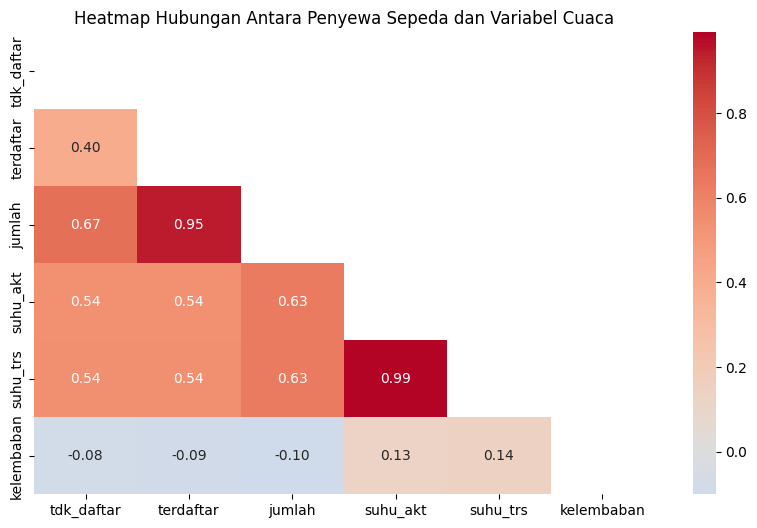

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = day_df[['tdk_daftar', 'terdaftar', 'jumlah', 'suhu_akt', 'suhu_trs', 'kelembaban']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Heatmap Hubungan Antara Penyewa Sepeda dan Variabel Cuaca")
plt.show()


Kesimpulan dari hasil tersebut ditemukan bahwa sebagai berikut:
1. Suhu & Kelembaban
*   Suhu aktual & terasa berhubungan positif dengan jumlah penyewa (positif kuat).
*   Kelembaban berhubungan negatif dengan jumlah penyewa (negatif lemah).
2. Jumlah Penyewa
*   Penyewa sepeda terdaftar & tidak terdaftar berhubungan positif dengan total penyewa (positif kuat).



## Visualization & Explanatory Analysis

###Apakah musim berpengaruh terhadap preferensi penyewa sepeda, baik penyewa tidak terdaftar maupun yang terdaftar?

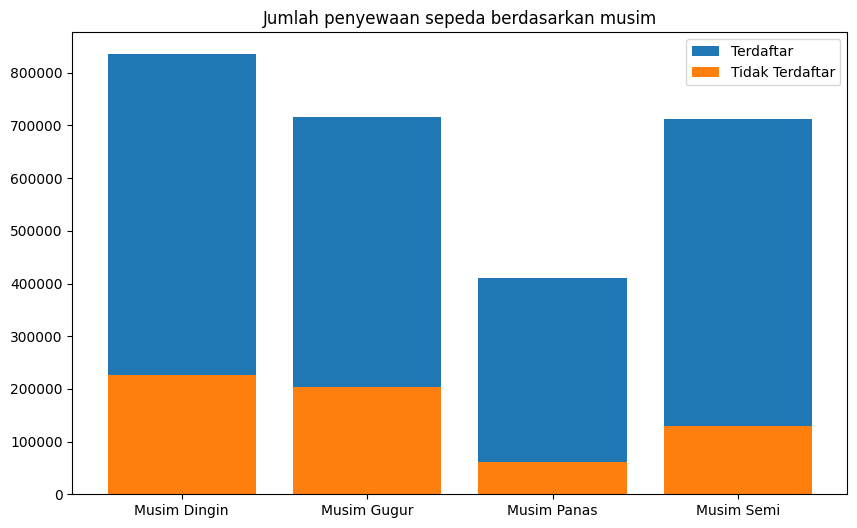

In [ ]:
# Mengelompokkan data berdasarkan musim
seasonal_usage = day_df.groupby('musim')[['terdaftar', 'tdk_daftar']].sum().reset_index()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat diagram batang
plt.bar(
    seasonal_usage['musim'],
    seasonal_usage['terdaftar'],
    label='Terdaftar',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['musim'],
    seasonal_usage['tdk_daftar'],
    label='Tidak Terdaftar',
    color='tab:orange'
)

# Menghilangkan label sumbu x dan sumbu y
plt.xlabel(None)
plt.ylabel(None)

# Judul diagram
plt.title('Jumlah penyewaan sepeda berdasarkan musim')

# Menambahkan legenda
plt.legend()

# Menampilkan diagram
plt.show()


Kesimpulan dari hasil visualisasi menggunakan diagram batang tersebut adalah:
1. Ditemukan bahwa jumlah penyewa terdaftar cenderung stabil sepanjang musim
2. Jumlah penyewa sepeda tidak terdaftar dengan puncak pada musim dingin dan mengalami penurunan tajam pada musim panas.

Maka dapat disimpulkan penggunaan sepeda oleh penyewa tidak terdaftar lebih dipengaruhi oleh cuaca dibanding dengan penyewa terdaftar.

### Bagaimana kondisi ketika sepeda digunakan pada hari kerja(hr_krj), hari libur(hr_lbr), dan hari biasa(hr_biasa)?

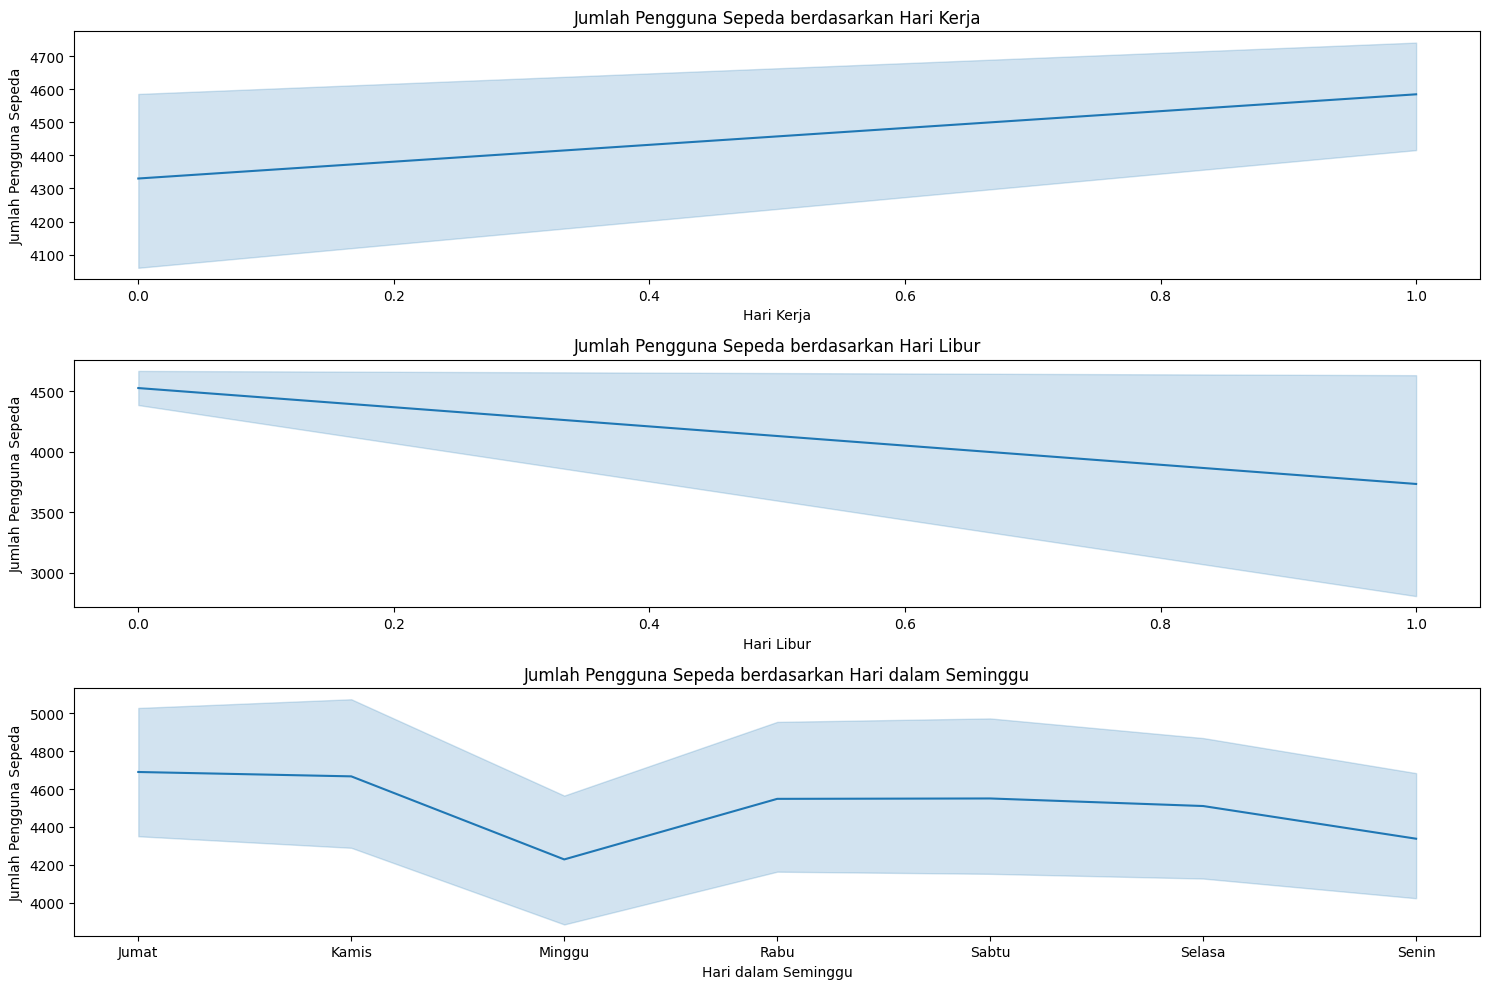

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan hari kerja
sns.lineplot(
    x='hr_krj',
    y='jumlah',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan hari libur
sns.lineplot(
  x='hr_lbr',
  y='jumlah',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan hari biasa
sns.lineplot(
  x='hr_biasa',
  y='jumlah',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Kesimpulan dari hasil visualisasi menggunakan lineplot tersebut adalah:
1. Hari Kerja (hr_krj): Grafik menunjukkan bahwa jumlah pengguna sepeda cenderung lebih tinggi pada hari kerja
2. Hari Libur (hr_lbr): Pada hari libur, terutama pada akhir pekan, terlihat peningkatan penggunaan sepeda. \
3. Hari Biasa (hr_biasa): Grafik menunjukkan variasi yang cukup konstan dalam penggunaan sepeda selama hari-hari dalam seminggu.

###Apakah cuaca memiliki peran dalam jumlah penyewa sepeda?


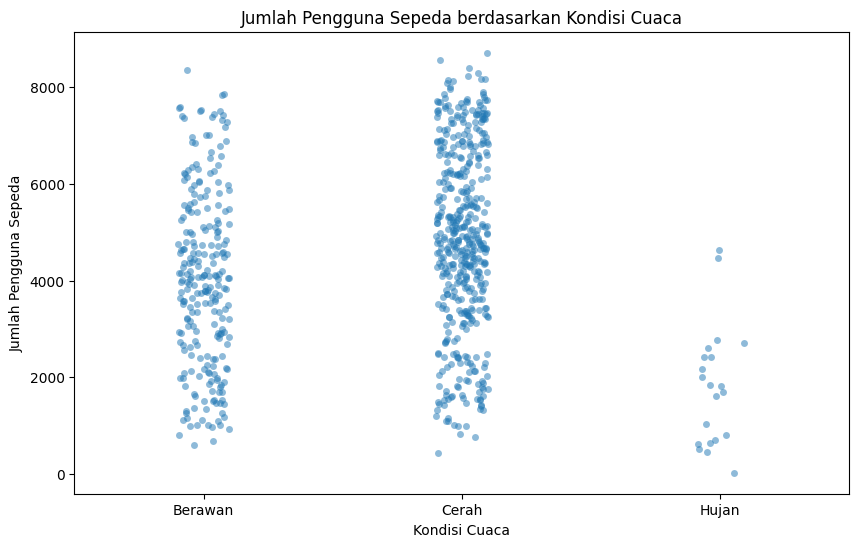

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(
    x='kondisi_cuaca',
    y='jumlah',
    data=day_df,
    alpha=0.5)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Kesimpulan dari hasil visualisasi menggunakan scatter plot tersebut yaitu sebagai berikut:
1. Jumlah penyewa sepeda cenderung lebih tinggi saat cuaca cerah atau berawan
2. Jumlah penyewa sepeda cenderung lebih rendah saat kondisi cuaca hujan
3. Dan tidak ada penyewa sepeda saat kondisi cuaca bersalju.

## Conclusion

**Conclusion pertanyaan 1**
"Apakah musim berpengaruh terhadap preferensi penyewa sepeda, baik penyewa tidak terdaftar maupun yang terdaftar?"

- Penyewa Terdaftar: Jumlah penyewa terdaftar cenderung stabil sepanjang musim.
- Penyewa Tidak Terdaftar: Jumlah penyewa cenderung meningkat pada musim dingin dan menurun tajam pada musim panas.

Dengan demikian, dapat disimpulkan bahwa penggunaan sepeda oleh penyewa tidak terdaftar lebih dipengaruhi oleh perubahan musim dibandingkan dengan penyewa terdaftar.


**Conclusion pertanyaan 2**
"Bagaimana kondisi ketika sepeda digunakan pada hari kerja(hr_krj), hari libur(hr_lbr), dan hari biasa(hr_biasa)?"

- Hari Kerja (hr_krj): Terlihat bahwa jumlah pengguna sepeda cenderung lebih tinggi pada hari kerja.
- Hari Libur (hr_lbr): Pada hari libur, terutama pada akhir pekan, terlihat peningkatan signifikan dalam penggunaan sepeda.
- Hari Biasa (hr_biasa): Grafik menunjukkan variasi yang cukup konstan dalam penggunaan sepeda selama hari-hari dalam seminggu.



**Conclusion pertanyaan 3**
"Apakah cuaca memiliki peran dalam jumlah penyewa sepeda?"

- Cuaca Cerah atau Berawan: Terlihat bahwa jumlah penyewa sepeda cenderung lebih tinggi saat cuaca cerah atau berawan.
- Cuaca Hujan: Dari visualisasi dapat dilihat bahwa jumlah penyewa sepeda cenderung lebih rendah saat kondisi cuaca hujan.
- Cuaca Bersalju: Tidak ada data atau observasi yang menunjukkan adanya penyewa sepeda saat kondisi cuaca bersalju.

Dengan demikian, dapat disimpulkan bahwa cuaca memainkan peran penting dalam menentukan jumlah penyewa sepeda, dimana kondisi cuaca yang cerah atau berawan cenderung meningkatkan penggunaan sepeda, sedangkan cuaca hujan atau bersalju cenderung menguranginya.


In [76]:
day_df.to_csv("true.csv", index=False)